In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as ima


/home/pedro/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# NGC 121

Características:
1. Posición (EquJ2000): RA = 00hrs 26min 48.2seg / DEC = -71d 32min 08seg
2. Tipo: Cúmulo globular
3. Magnitud: 11

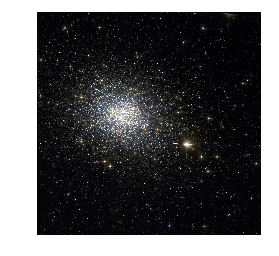

In [28]:
%matplotlib inline
img = ima.imread('./NGC_121_Hubble_WikiSky.jpg')
plt.axis('off')
plt.imshow(img)

En la página http://hla.stsci.edu/ (*Hubble Legacy Archive*) se descargan dos imágenes correspondientes a las bandas de f555w (filtro V en el sistema Johnson correspondiente a la longitud de onda visible) y f814w (filtro I en el sistema Johnson correspondiente a la longitud de onda infrarroja). Ambas obtenidas con los instrumentos abordo del telescopio espacial **ACS** (*Advance Camera for Surveys*) y **HRC** (*High Resolution Channel*) 

/home/pedro/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in log10
/home/pedro/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in log10
/home/pedro/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log10
/home/pedro/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in log10


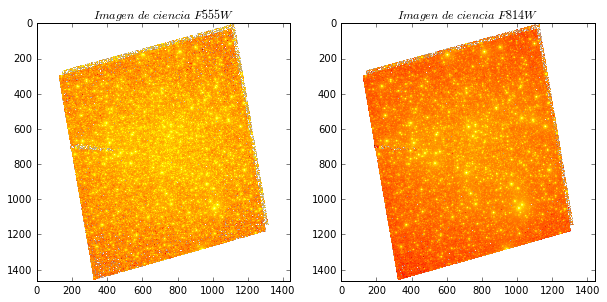

In [6]:
%matplotlib inline
hd1 = fits.open('f555.fits') #archivos que se extrajeron de la web
hd2 = fits.open('f814.fits')

ext1 = hd1[1]
ext2 = hd2[1]

ext1.writeto('sci_f555w_N121.fits', clobber = True)
ext2.writeto('sci_f814w_N121.fits', clobber = True)

ext1 = hd1[2]
ext2 = hd2[2]

ext1.writeto('invvar_f555w_N121.fits', clobber = True)
ext2.writeto('invvar_f814w_N121.fits', clobber = True)

hd1.close()
hd2.close()

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.title("$Imagen\ de\ ciencia\ F555W$")
hd1 = fits.open('sci_f555w_N121.fits')
dat = hd1[1].data
imgplot = plt.imshow(np.log10(dat),cmap="hot")

plt.subplot(1,2,2)
plt.title("$Imagen\ de\ ciencia\ F814W$")
hd2 = fits.open('sci_f814w_N121.fits')
dat = hd2[1].data
imgplot = plt.imshow(np.log10(dat),cmap='hot')

hd1.close()
hd2.close()



Cada FITS posee la siguiente información:

In [28]:
hd1 = fits.open('f555.fits')
hd1.info()

Filename: f555.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     824   ()              
1    SCI         ImageHDU        70   (1442, 1464)   float32   
2    WHT         ImageHDU        47   (1442, 1464)   float32   
3    CTX         ImageHDU        40   (1442, 1464)   int32   
4    HDRTAB      BinTableHDU    631   6R x 311C    [9A, 3A, J, D, D, D, D, D, D, D, D, D, D, D, D, 4A, J, 7A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, J, 8A, 23A, D, D, D, D, J, J, J, 8A, J, 23A, 9A, 19A, D, 1A, D, J, J, J, J, J, 23A, D, D, D, D, J, J, 3A, 23A, D, 4A, J, D, D, D, 3A, 1A, J, D, D, D, D, D, 4A, 4A, 12A, 12A, 3A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 3A, D, J, D, 6A, 9A, 8A, D, D, J, 4A, 18A, 3A, J, 5A, 7A, 3A, D, 13A, 8A, 4A, 3A, J, J, J, J, J, J, J, D, D, D, D, D, D, 23A, 1A, D, 23A, D, D, D, 3A, 23A, J, 1A, 3A, 1A, D, 3A, 6A, D, D, D, D, D, D, D, D, D, D, D, 23A, D, D, D, D, 3A, D, D, D, 1A, J, J, J, J, J, J, 23A

Donde: 
1. primera extensión: Corresponde a la imagen de ciencia.
2. segunda extensión: Corresponde a la imagen con los pesos estadísticos para cada pixel.
3. tercera extensión: Corresponde a la imagen de contexto que registra la contribucion de las imagenes de input a cada pixel. 
4. cuarta extensión: Corresponde a una tabla binaria.
5. quinta extension: Corresponde a la imagen con el tiempo de exposición efectiva para cada pixel.



In [69]:
from astropy.io import ascii 
fil = open("./default.sex","r")
body = fil.read()
fil.close()
print body

# Default configuration file for SExtractor 2.8.6
# EB 2013-01-30
#
 
#-------------------------------- Catalog ------------------------------------
 
CATALOG_NAME     f814.cat       # name of the output catalog
CATALOG_TYPE     ASCII_HEAD     # NONE,ASCII,ASCII_HEAD, ASCII_SKYCAT,
                                # ASCII_VOTABLE, FITS_1.0 or FITS_LDAC
PARAMETERS_NAME  default.param  # name of the file containing catalog contents
 
#------------------------------- Extraction ----------------------------------
 
DETECT_TYPE      CCD            # CCD (linear) or PHOTO (with gamma correction)
DETECT_MINAREA   1              # minimum number of pixels above threshold
THRESH_TYPE      RELATIVE       # threshold type: RELATIVE (in sigmas)
                                # or ABSOLUTE (in ADUs)
DETECT_THRESH    2.0            # <sigmas> or <threshold>,<ZP> in mag.arcsec-2
ANALYSIS_THRESH  1.5            # <sigmas> or <threshold>,<ZP> in mag.arcsec-2
 
FILTER           Y              # apply fi

Se puede apreciar el archivo de configuración que se le entrega a *SExtractor*, Todos los parametros estan en el modo default exepto los siguientes:
+ CATALOG_NAME: se coloca el nombre del catalogo de output.
+ DETECT_MINAREA: 1*
+ DETECT_THRESH: 2.0*
+ DEBLEND_NTHRESH: 50
+ DEBLEND_MINCONT: 0.0005
+ WEIGHT_TYPE: MAP_WEIGHT
+ WEIGHT_IMAGE: se coloca el nombre de la extensión *.FITS* que se extrajo anteriormente que contenía el peso estadístico de la imagen. 
+ PHOT_APERTURES: 6
+ GAIN: 2,0
+ PIXEL_SCALE: 0
+ BACK_SIZE: 100
+ CHECKIMAGE_TYPE: APERTURE (se optó por esto debido a que era necesario saber que estrellas estaba detectando *SExtractor* de este modo se observaba que parametros era necesario ajustar para obtener una mejor evaluación del cúmulo, i.e. número de estrellas que detectaba, tamaño de la estrella que detectaba, si detectaba algunas muy juntas o no, etc..)

Ciertamente no hay un criterio fijo para cada parametro en especial a los que tienen que ver con la deteción del Background, separar estrellas y el Threshold, es en este último donde se probaron varias posibilidades.

In [42]:
fil = open("f814.cat","r")
for i in range(0,5):
    body = fil.readline()
    print body

fil.close()

#   1 NUMBER                 Running object number                                     

#   2 MAG_APER               Fixed aperture magnitude vector                            [mag]

#   3 MAGERR_APER            RMS error vector for fixed aperture mag.                   [mag]

#   4 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   5 DELTA_J2000            Declination of barycenter (J2000)                          [deg]



Como output tenemos el catálogo que contiene: ID de la estrella, la magnitud, el error en la magnitud, ascención recta y declinación.

A continuación se muestra el código empleado para plotear el diagrama color magnitud, donde se le entregan los catálogos y la función `astropy.coordinates` y `match_coordinates_sky`, entre otras, emparejaron las estrellas de ambos catálogos de modo que solo hubiera un match por estrella. Además como en *SExtractor* no se corrigieron los *zeropoint* se calibran a continuación junto con la calibración por extinción estelar y apertura. Como estamos calibrando la magnitudes en VEGAMAG el *zeropoint* es el que por definicón al ser sumada a la magnitud de Vega en una banda de 0. La calibración por extinción se debe a que la luz que viaja de la estrella se ve absorbida por el medio interestelar, en especial la luz azul, luego la estrella se ve mas roja de lo que es realmente. Finalmente se corrige por apertura, esto es, compensar de cierto modo la luz que se esta perdiendo al elegir una apertura y no otra para realizar la fotometría. 

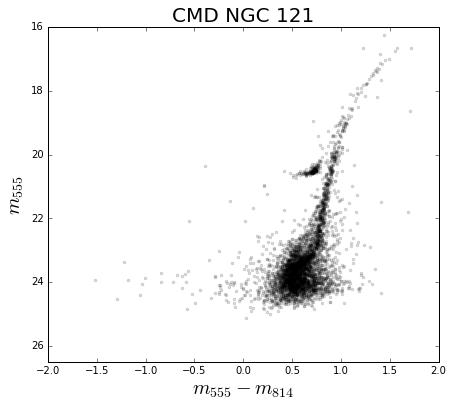

In [79]:
from astropy.coordinates import match_coordinates_sky
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import ascii   
%matplotlib inline

#----------------------f555-------------------------------
fil = open("./f555.cat","r") 
body = ascii.read(fil)

RA1 = np.array(body["ALPHA_J2000"])
DEC1 = np.array(body["DELTA_J2000"])
MAG1 = np.array(body["MAG_APER"]) + 25.255 + 0.914 + 0.101  # Mag_source - Mag_zp - Mag_ap - Mag_rd
MAG_ERR1 = np.array(body["MAGERR_APER"])

fil.close()

#----------------------f814-------------------------------
fil = open("./f814.cat","r") 
body = ascii.read(fil)

RA2 = np.array(body["ALPHA_J2000"])
DEC2 = np.array(body["DELTA_J2000"])
MAG2 = np.array(body["MAG_APER"]) + 24.849 + 0.857 + 0.056 # Mag_source - Mag_zp - Mag_ap - Mag_rd
MAG_ERR2 = np.array(body["MAGERR_APER"])

fil.close()

c = SkyCoord(ra=RA2*u.degree, dec=DEC2*u.degree)  
catalog = SkyCoord(ra=RA1*u.degree, dec=DEC1*u.degree)  
idx, d2d, d3d = match_coordinates_sky(c, catalog)

aux = []
aux2 = []

for i in range(0,len(RA2)):
    color = MAG1[idx[i]] - MAG2[i]
    err_color = np.sqrt(MAG_ERR1[idx[i]]**2 + MAG_ERR2[i]**2)
    aux.append(color)
    aux2.append(err_color)

plt.figure(figsize=(7,6))
plt.xlim(-2,2)
plt.ylim(16,26.5)
plt.gca().invert_yaxis()
plt.title("CMD NGC 121",size=20)
plt.xlabel('$m_{555}-m_{814}$',size=20)
plt.ylabel('$m_{555}$',size=20)
plt.errorbar(aux,MAG2, fmt='.',color='k', alpha = 0.15)
plt.savefig("CMD.png")


## Resultados

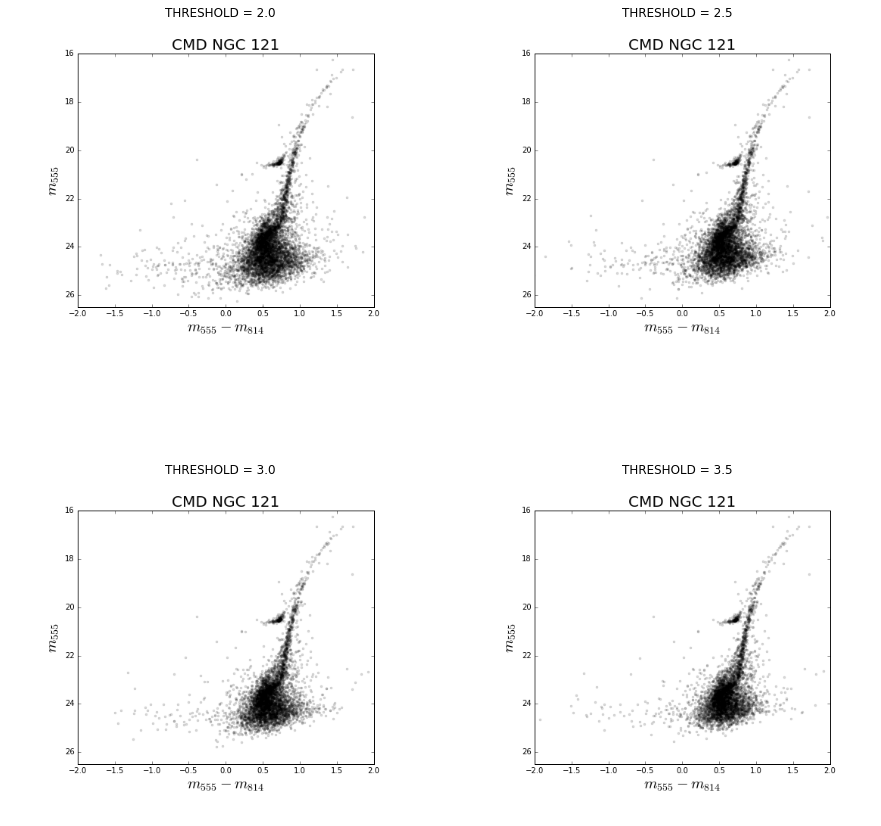

In [66]:
%matplotlib inline
from matplotlib import gridspec

fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1])

plt.subplot(gs[0])
plt.axis('off')
dat = ima.imread('CMD_THR_2.0.png')
plt.title("THRESHOLD = 2.0")
plt.imshow(dat)

plt.subplot(gs[1])
plt.axis('off')
dat = ima.imread('CMD_THR_2.5.png')
plt.title("THRESHOLD = 2.5")
plt.imshow(dat)

plt.subplot(gs[2])
plt.axis('off')
dat = ima.imread('CMD_THR_3.0.png')
plt.title("THRESHOLD = 3.0")
plt.imshow(dat)

plt.subplot(gs[3])
plt.axis('off')
dat = ima.imread('CMD_THR_3.5.png')
plt.title("THRESHOLD = 3.5")
plt.imshow(dat)

A un **DETECT_MINAREA = 1**: 
Podemos observar que a medida que vamos aumentando el Threshold se puede apreciar mejor la forma que va teniendo el diagrama Color-Magnitud, sin embargo, perdemos estrellas poco luminosas y con ellas parte de la información.

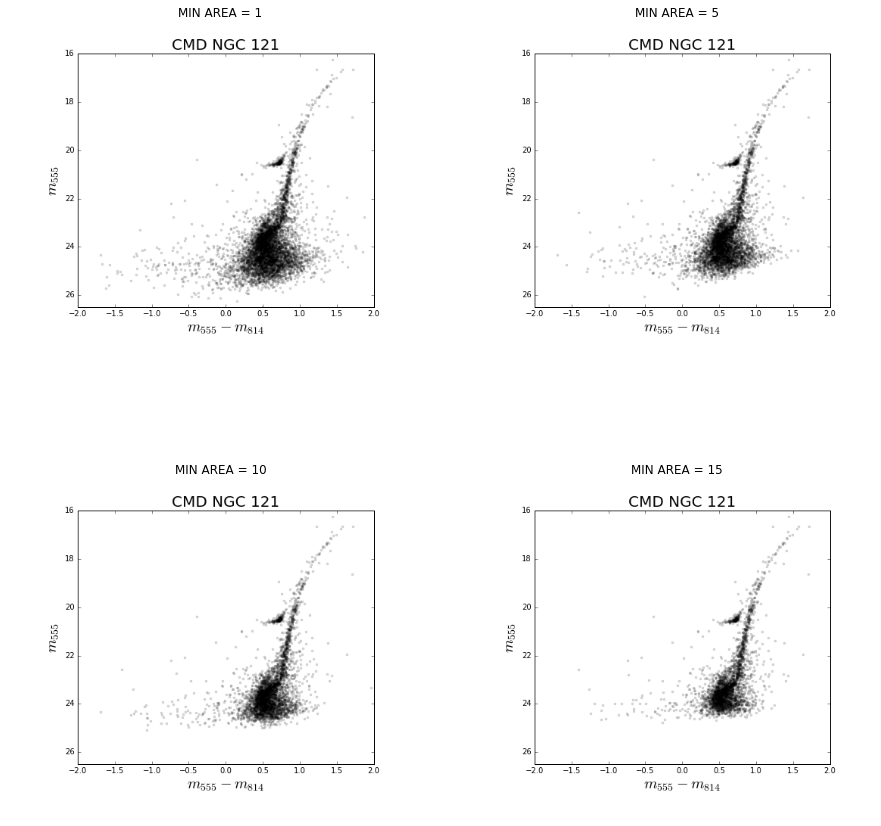

In [73]:
%matplotlib inline
from matplotlib import gridspec

fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1])

plt.subplot(gs[0])
plt.axis('off')
dat = ima.imread('CMD_DMA_1.png')
plt.title("MIN AREA = 1")
plt.imshow(dat)

plt.subplot(gs[1])
plt.axis('off')
dat = ima.imread('CMD_DMA_5.png')
plt.title("MIN AREA = 5")
plt.imshow(dat)

plt.subplot(gs[2])
plt.axis('off')
dat = ima.imread('CMD_DMA_10.png')
plt.title("MIN AREA = 10")
plt.imshow(dat)

plt.subplot(gs[3])
plt.axis('off')
dat = ima.imread('CMD_DMA_15.png')
plt.title("MIN AREA = 15")
plt.imshow(dat)

A un **DETECT_THRESH = 2.0**: A medida que va aumentando la MIN AREA el número de estrellas débiles y pequeñas va disminuyendo.


Finalmente teniendo lo anterior en mente, buscamo un término medio, esto es, DETECT_THRESH = 2.75 y DETECT_MINAREA = 7, lo que da como resultado.


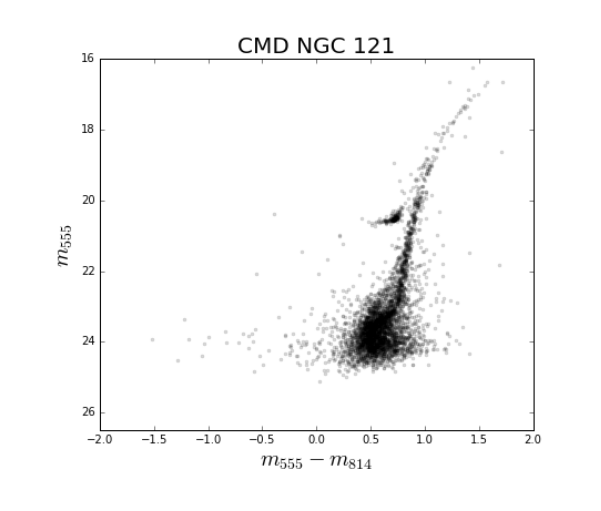

In [82]:
%matplotlib inline
plt.figure(figsize=(10,9))
plt.axis('off')
dat = ima.imread('CMD.png')
plt.imshow(dat)